In [38]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from my_functions import plot_signals

def lms_filter(d, x, mu, order):
    """
    LMS Filter Implementation.
    
    Parameters:
    - d: The desired signal (reference signal)
    - x: The input signal (noisy signal)
    - mu: Step size (learning rate)
    - order: Order of the filter (number of taps)
    
    Returns:
    - y: The output signal after filtering
    - e: The error signal (difference between desired and output)
    - w: The filter coefficients (weights)
    """
    # Initialize variables
    N = len(x)
    w = np.zeros(order)  # Initial weights of the filter
    y = np.zeros(N)  # Output signal
    e = np.zeros(N)  # Error signal
    
    # LMS algorithm loop
    for n in range(order, N):
        # Input vector (window of the input signal)
        x_n = x[n-order+1:n+1][::-1]  # Get a window of the input signal
        y[n] = np.dot(w, x_n)  # Compute filter output (dot product of weights and input window)
        e[n] = d[n] - y[n]  # Calculate error (difference between desired and output)
        
        # Update filter weights using LMS formula
        w = w + mu * e[n] * x_n
    
    return y, e, w

data = scipy.io.loadmat("ex_2.mat")
ppg = data["fotopletismograma"][0]
acc = data["aceleracao"][0]

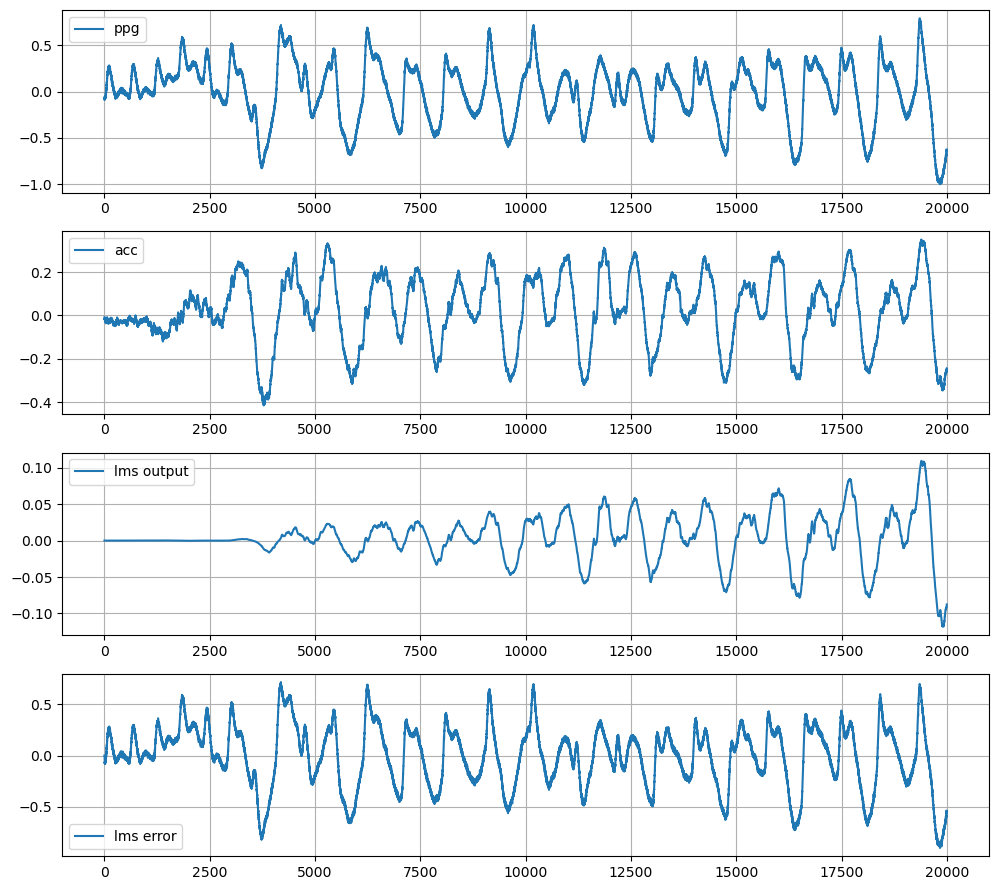

In [49]:
y, e, w = lms_filter(ppg, acc, mu=0.0001, order=5)
plot_signals([(ppg, "ppg"), (acc, "acc"), (y, "lms output"), (e, "lms error")])

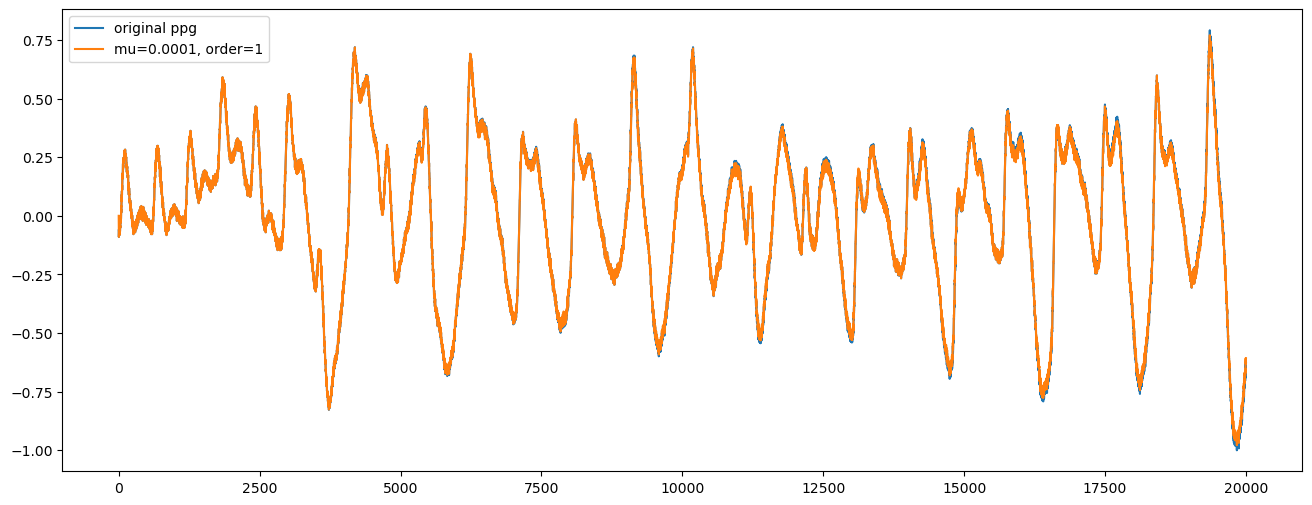

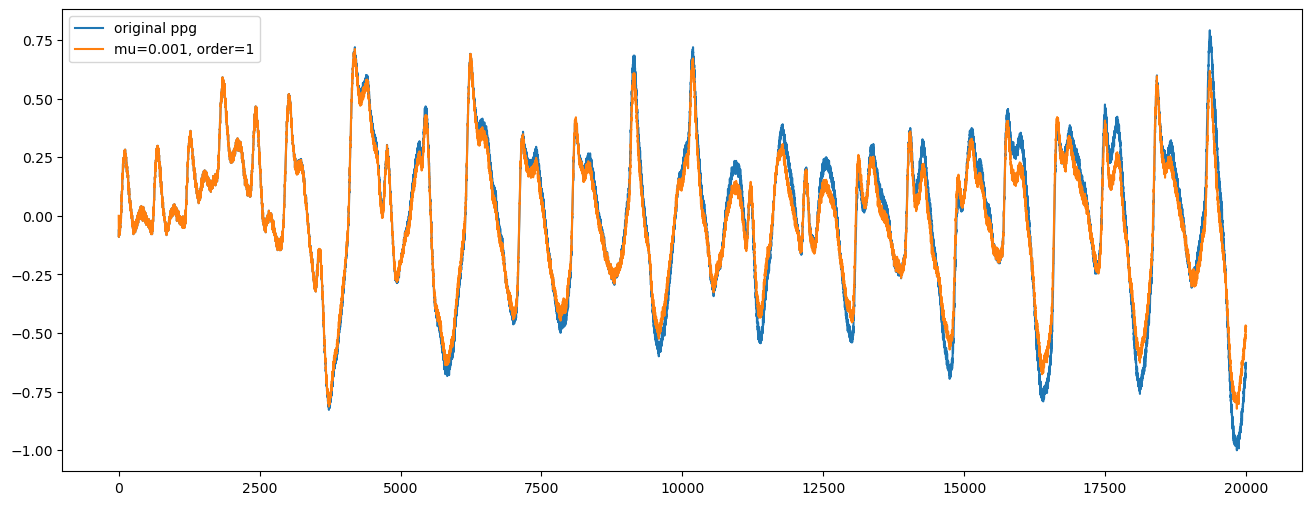

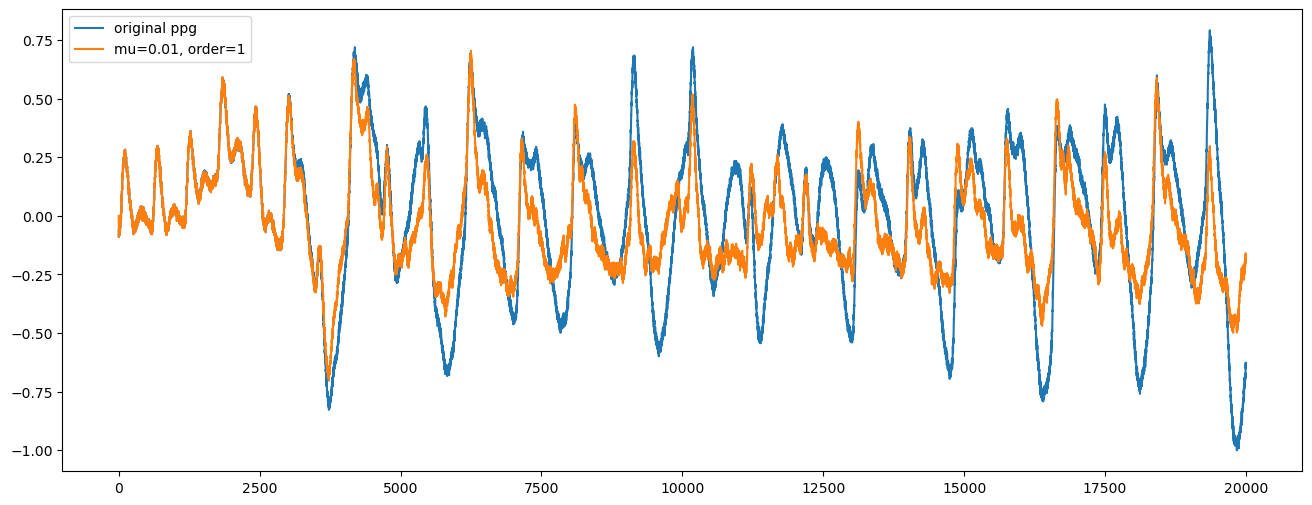

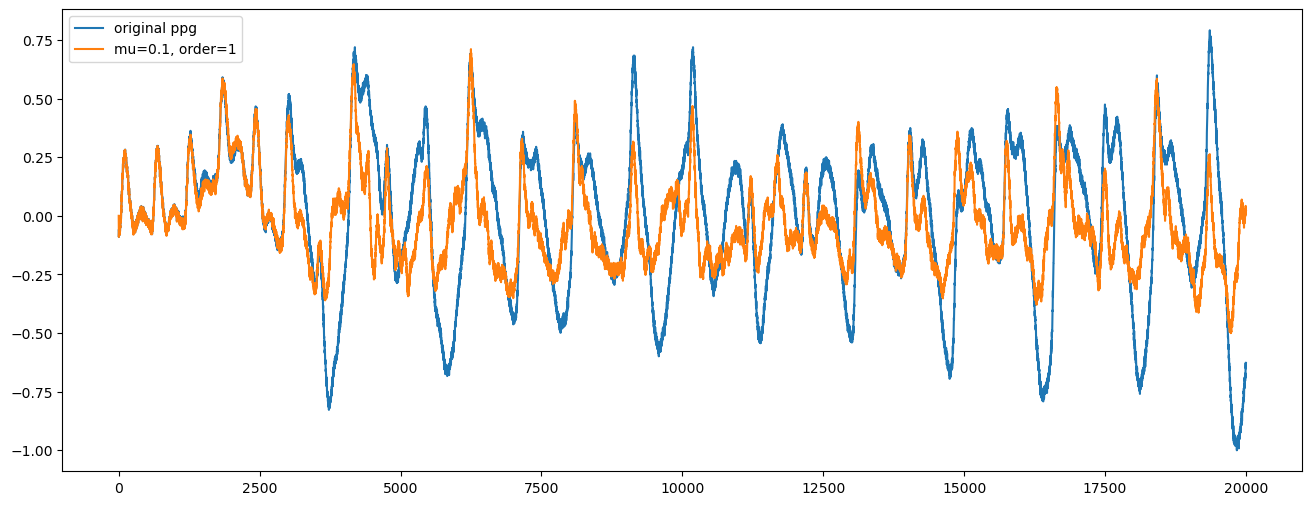

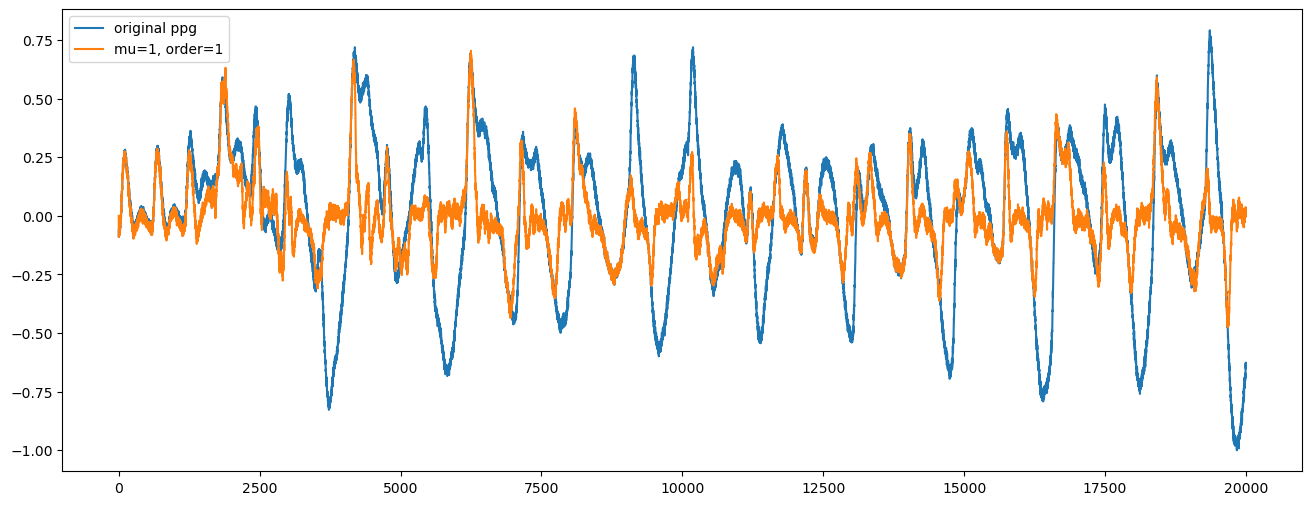

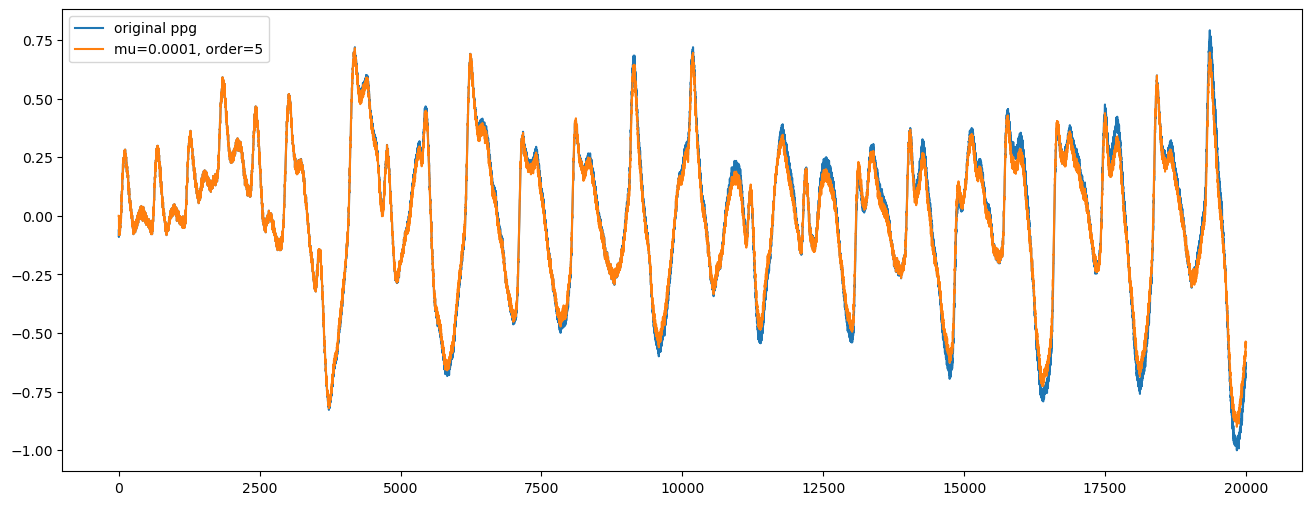

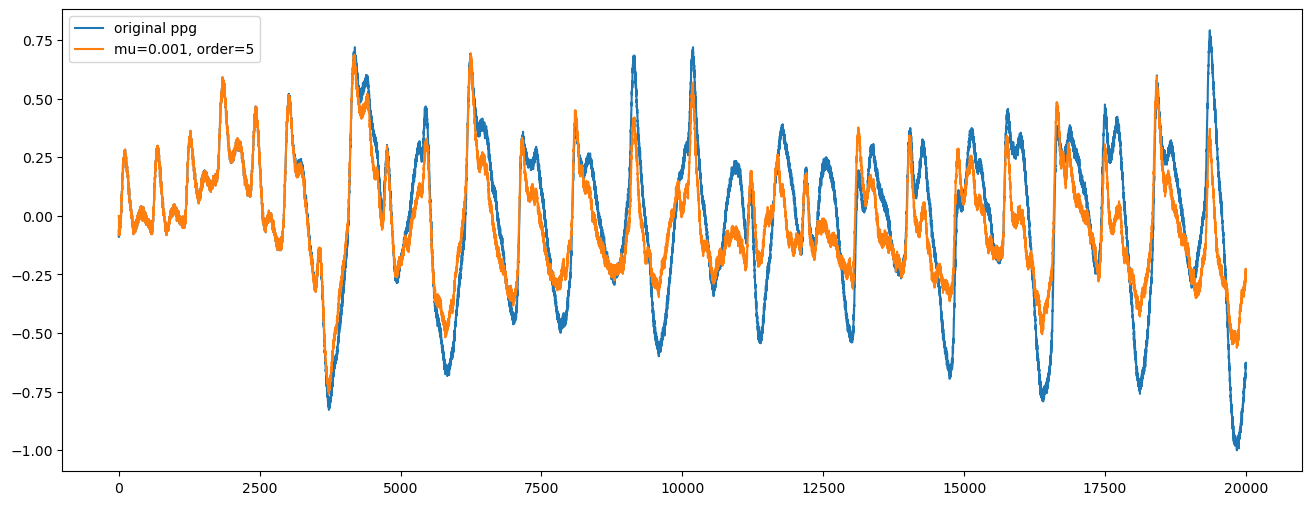

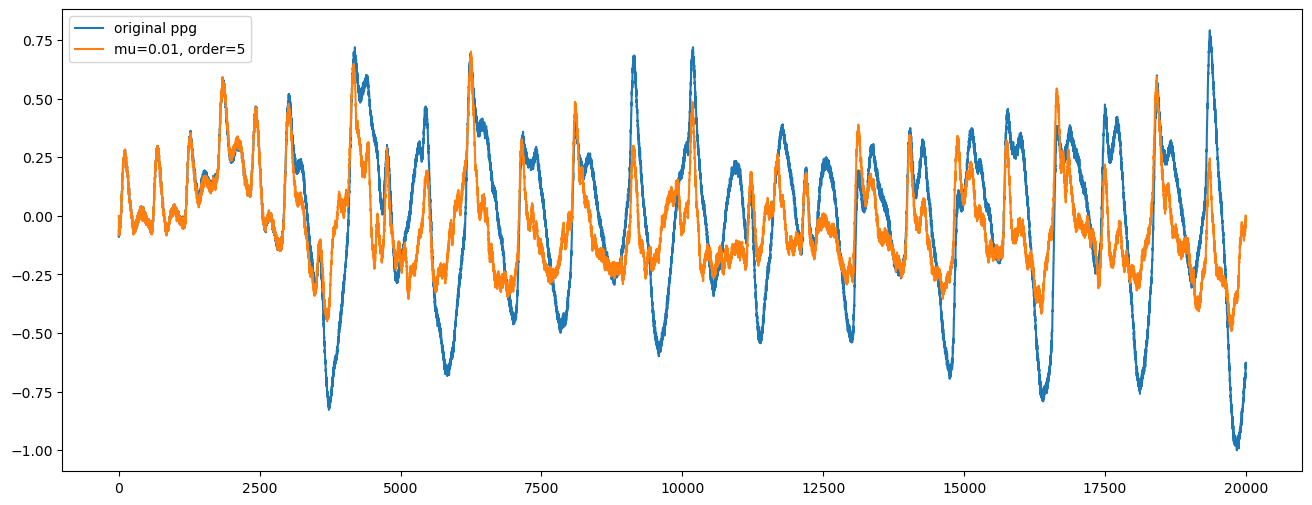

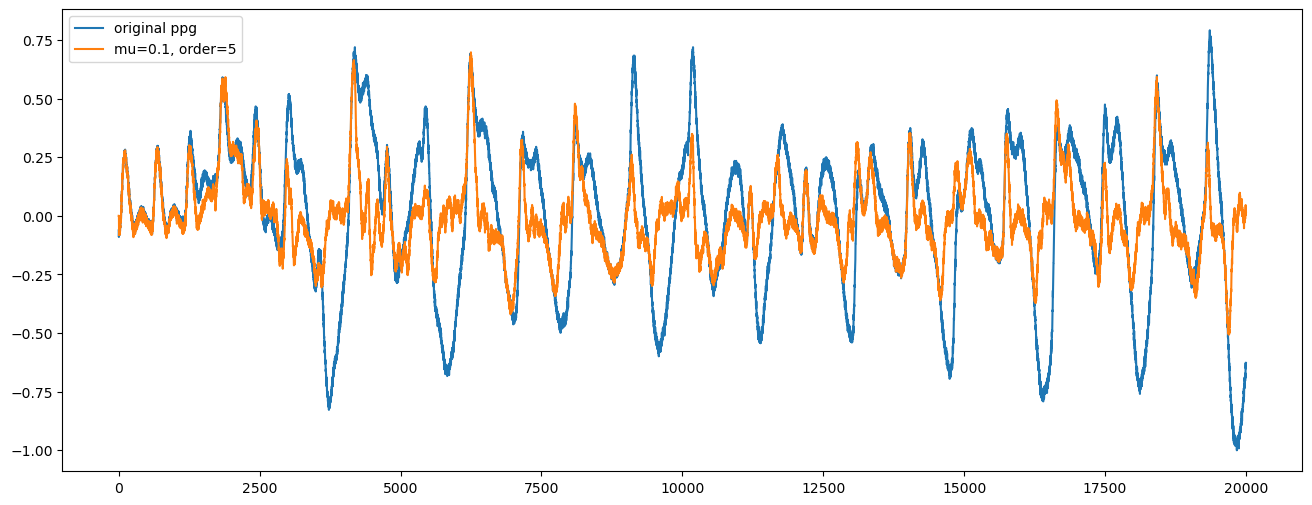

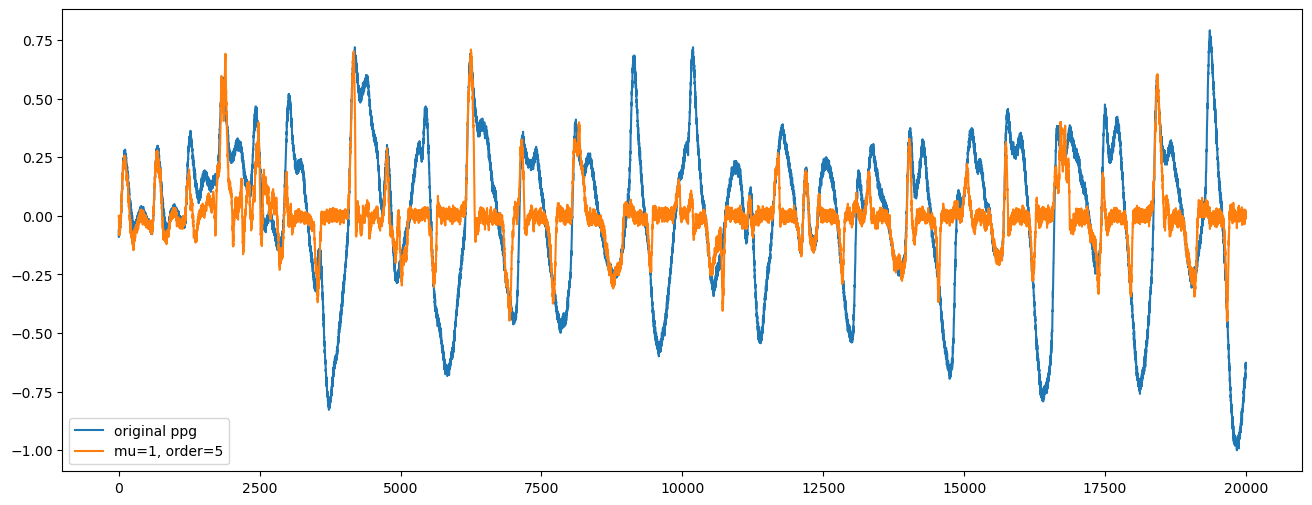

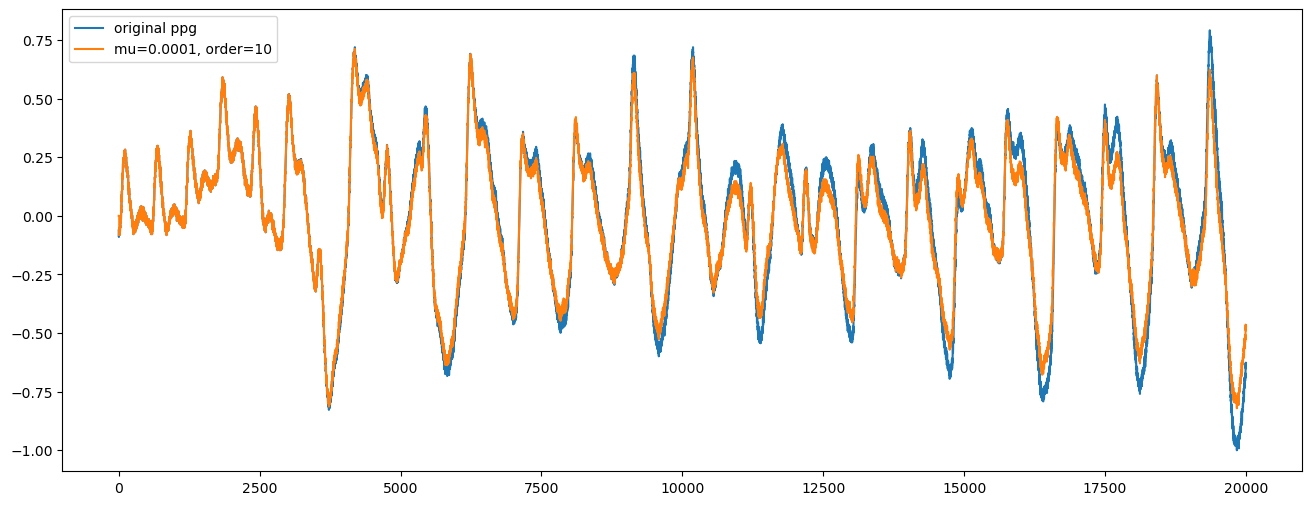

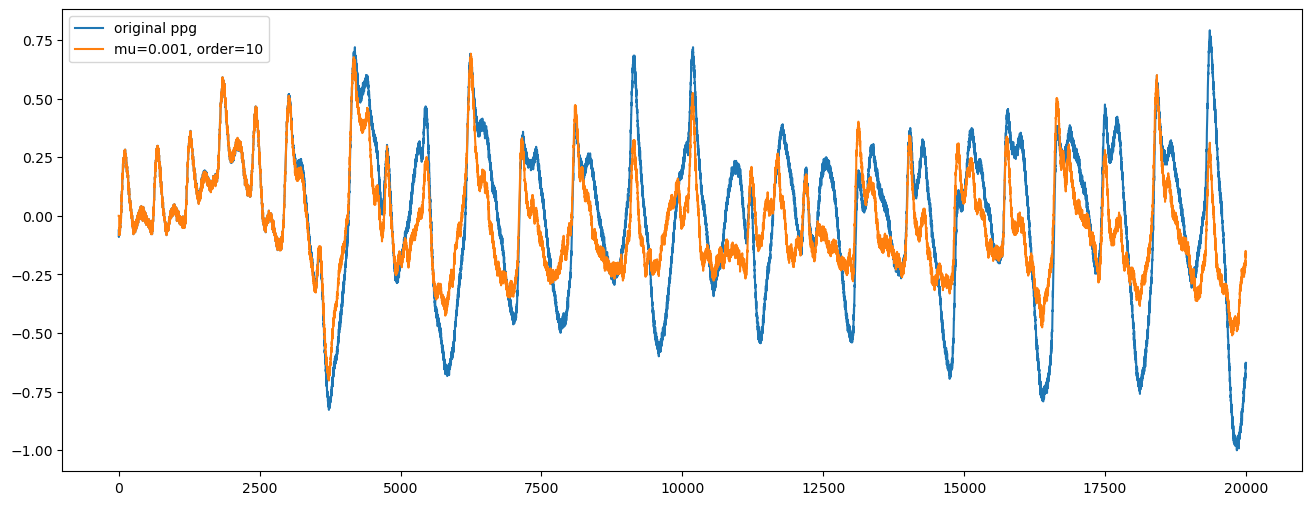

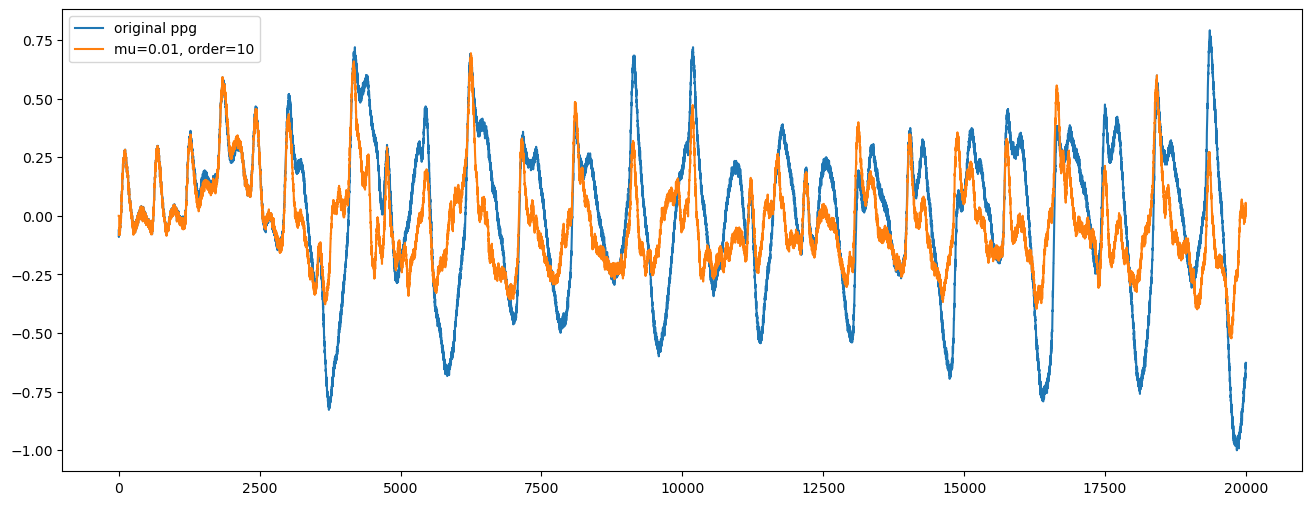

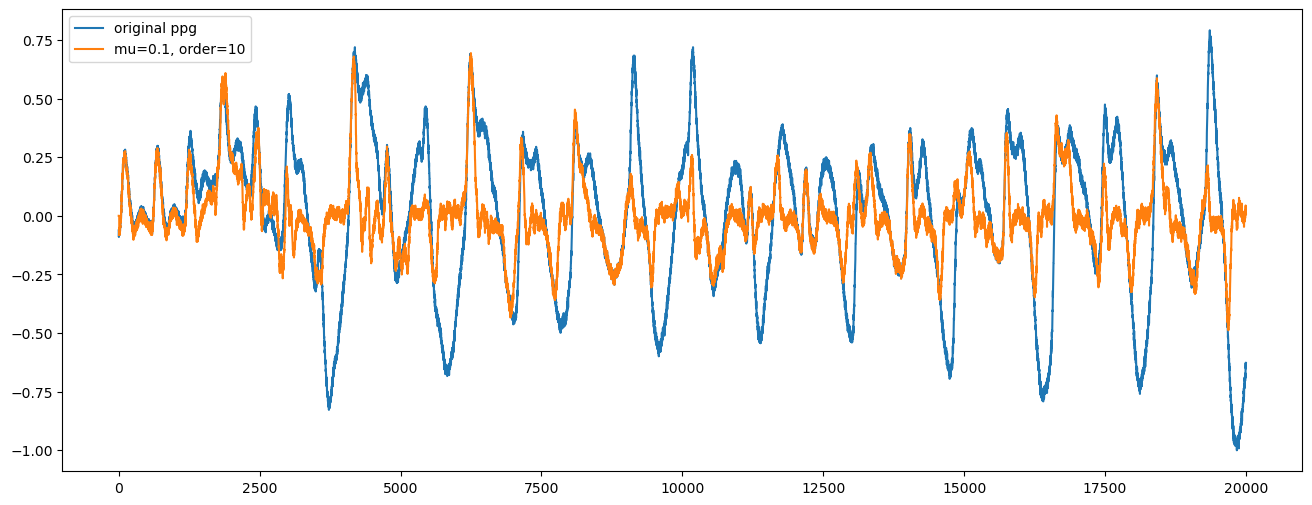

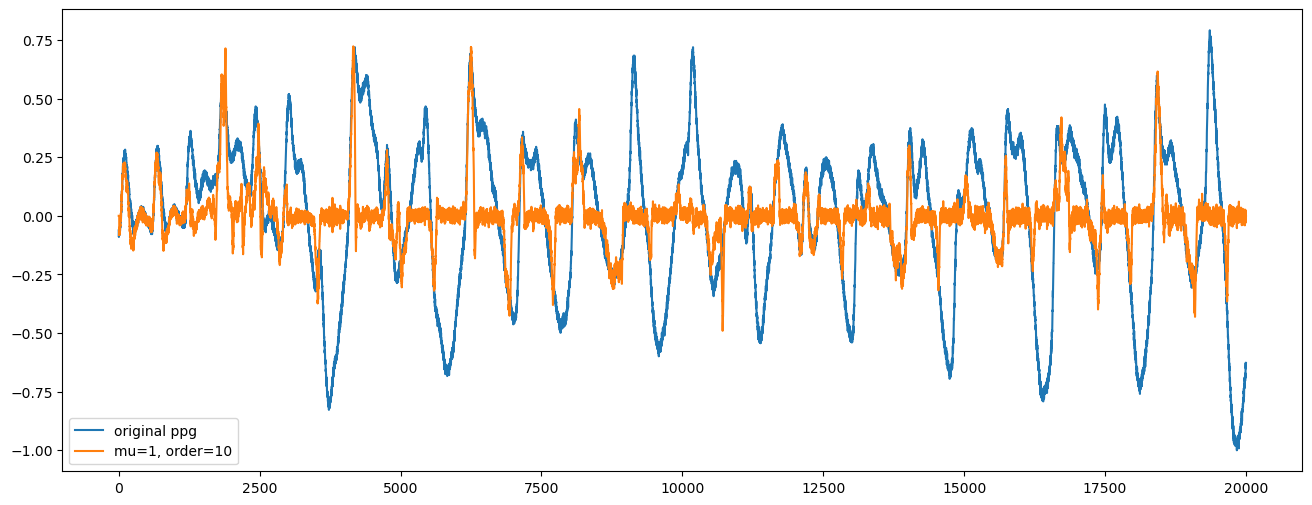

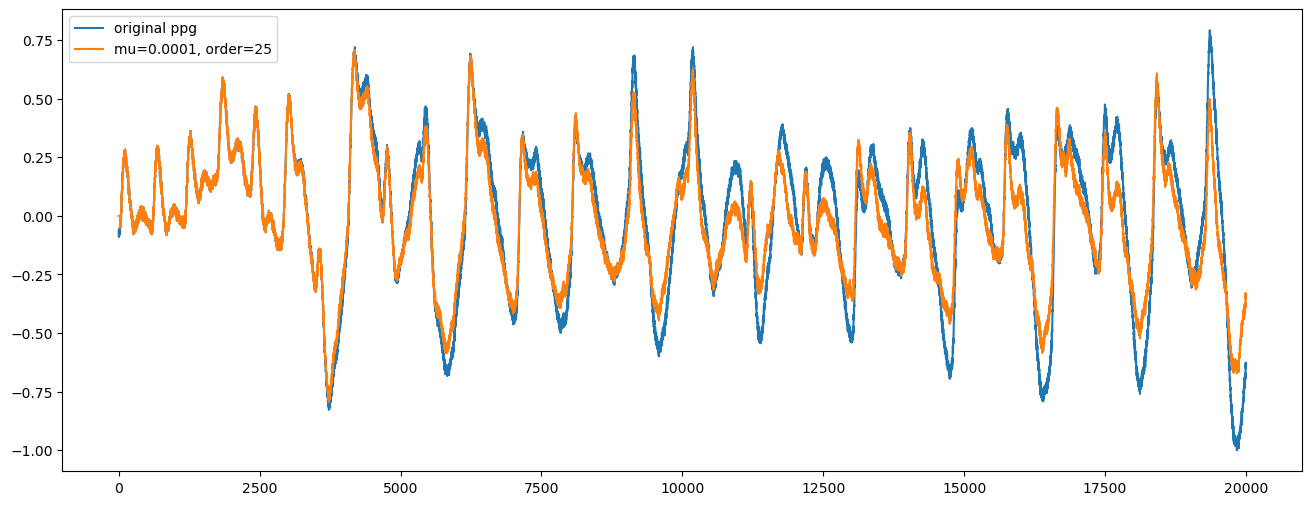

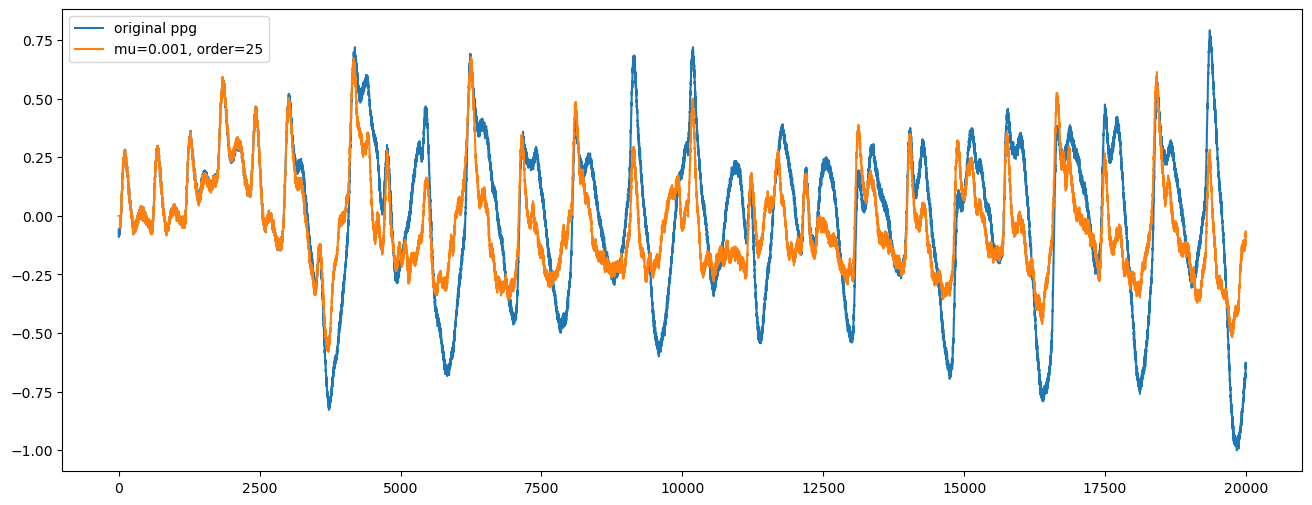

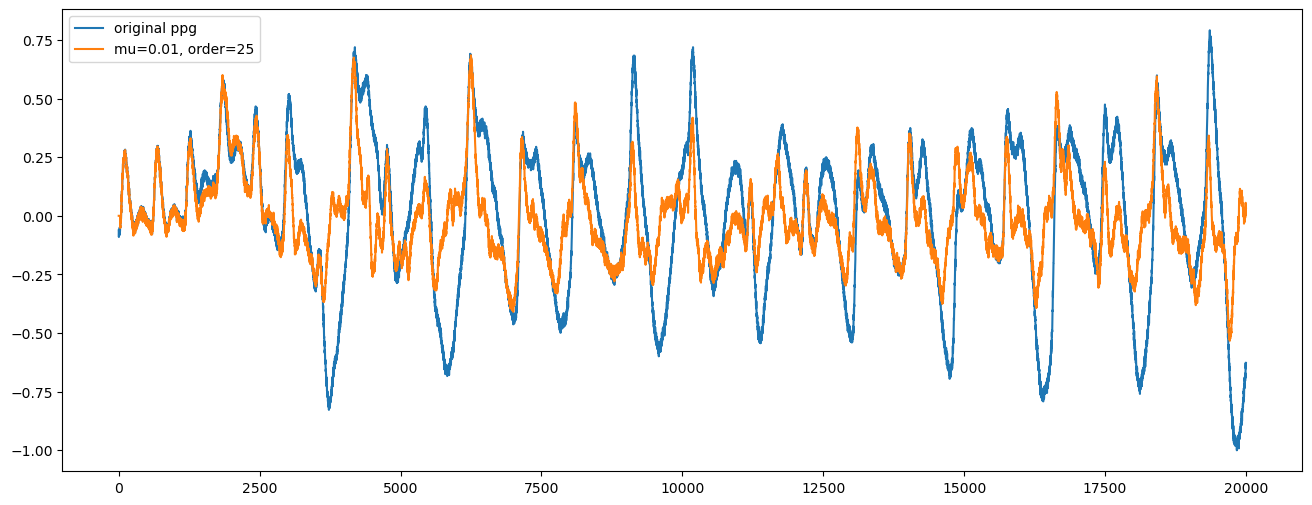

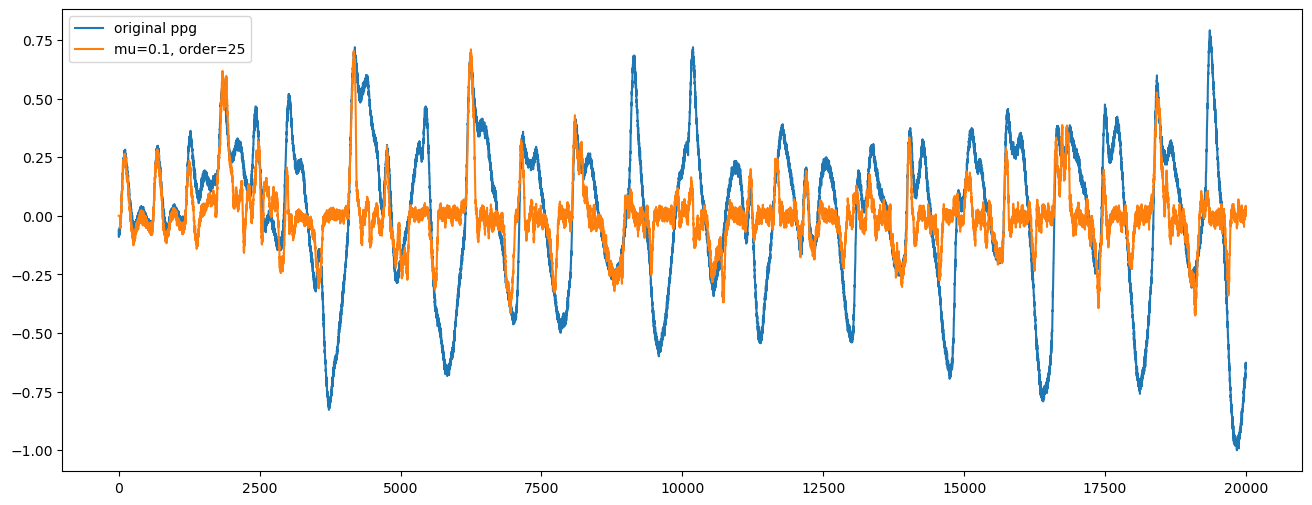

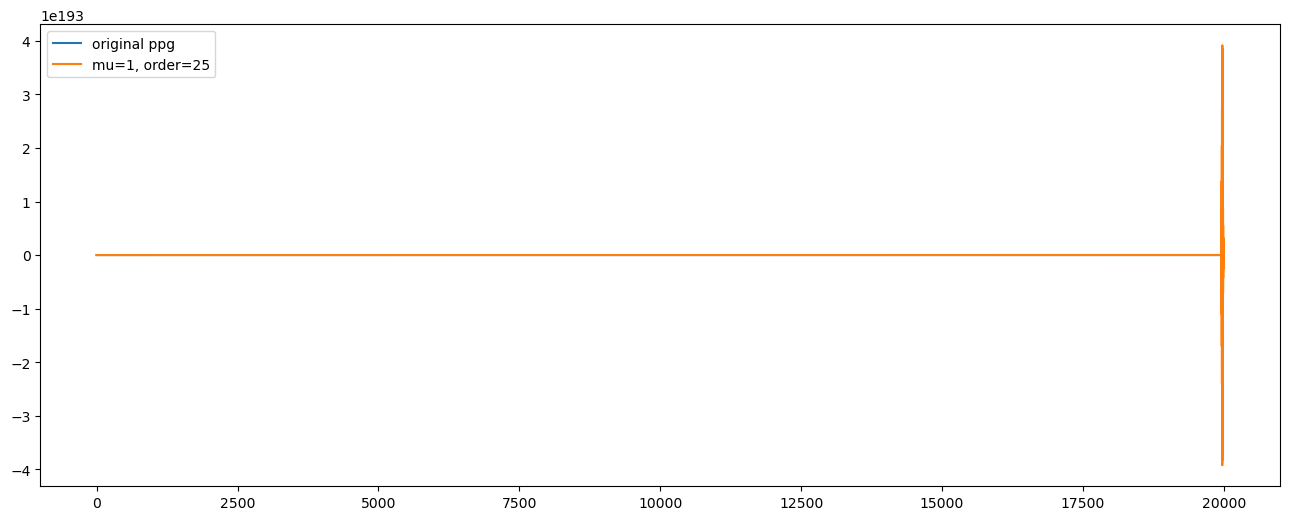

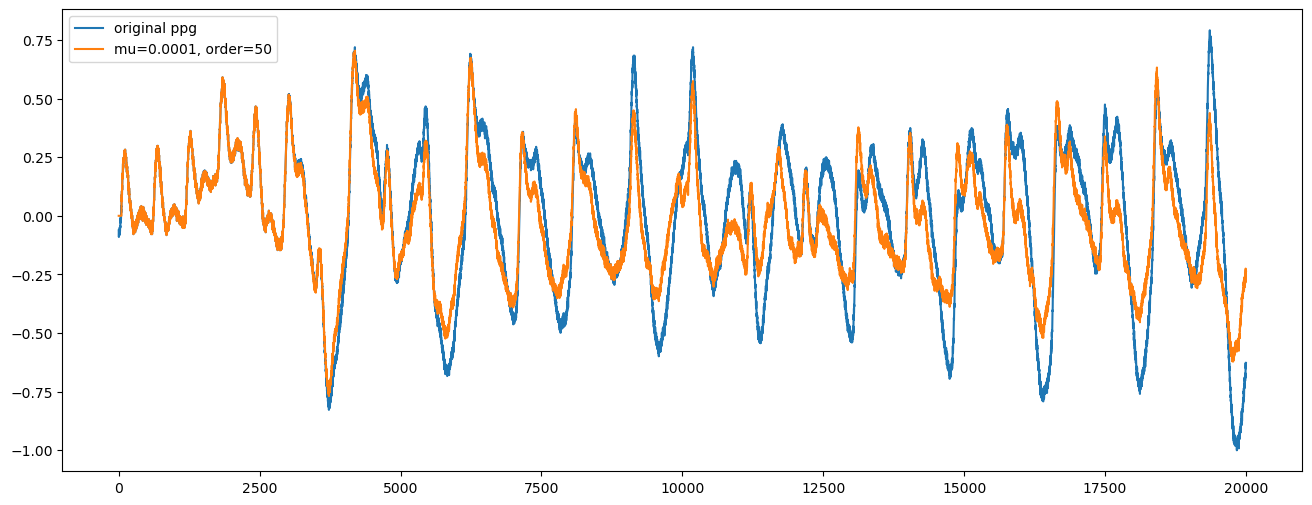

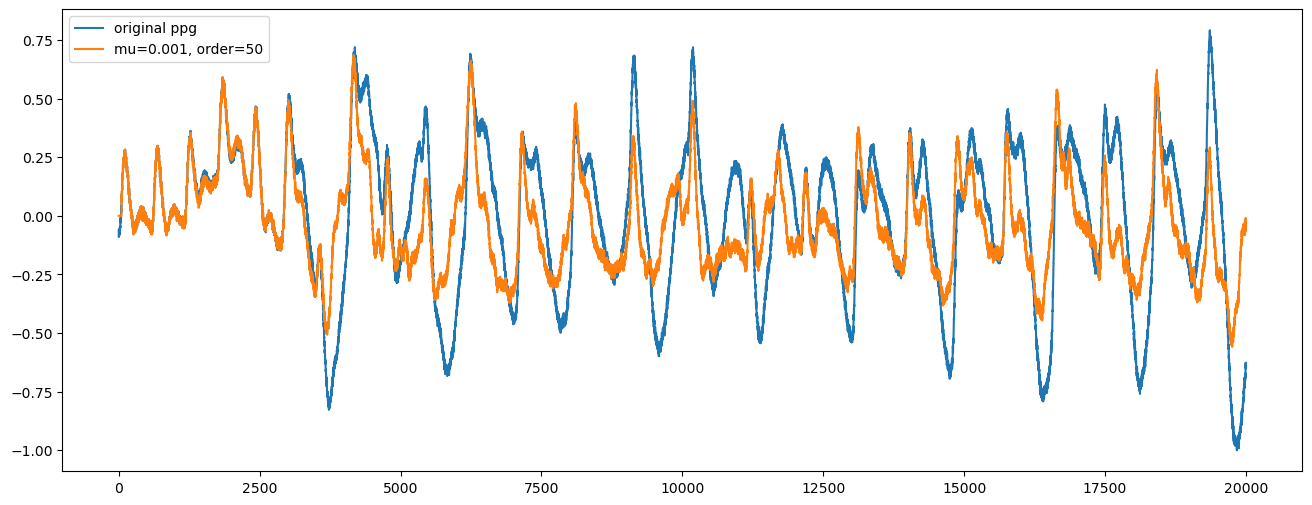

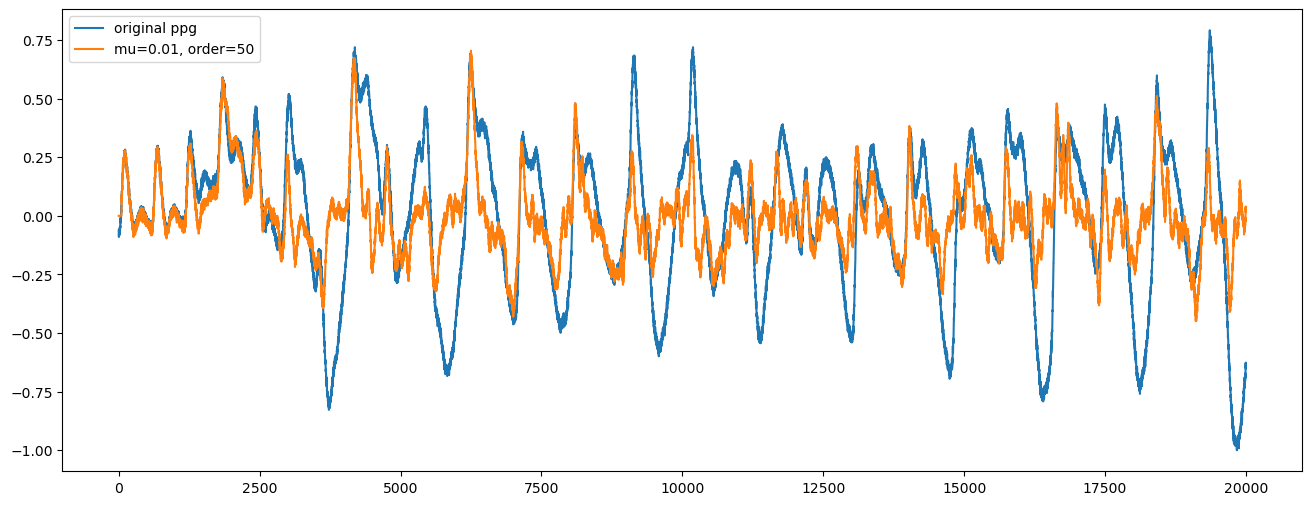

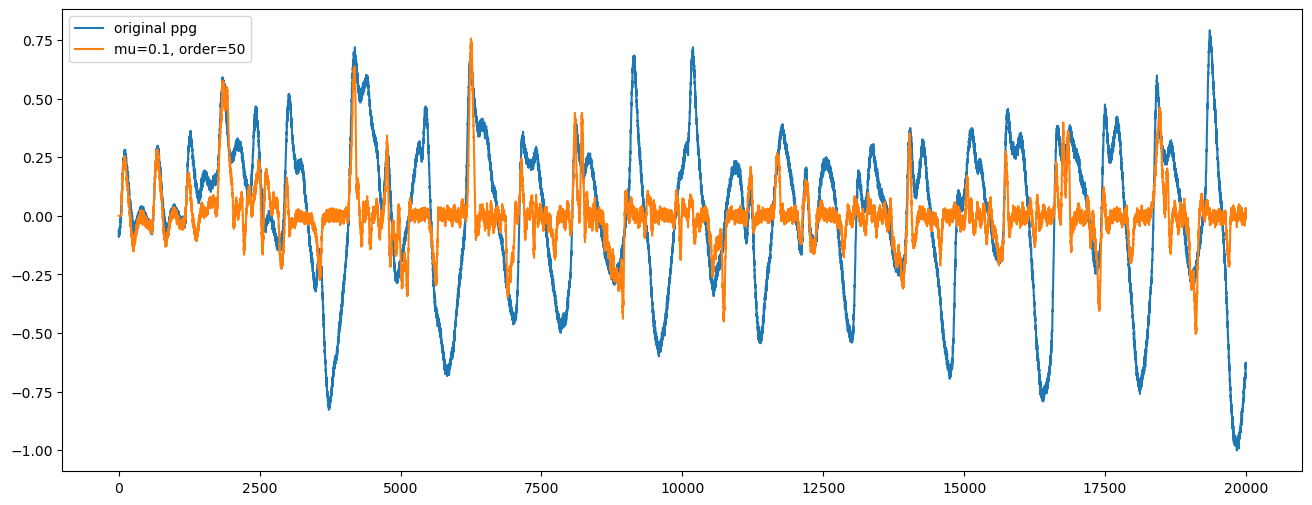

/tmp/ipykernel_324964/461547714.py:35: RuntimeWarning: invalid value encountered in add
  w = w + mu * e[n] * x_n


ValueError: arange: cannot compute length

<Figure size 1600x600 with 1 Axes>

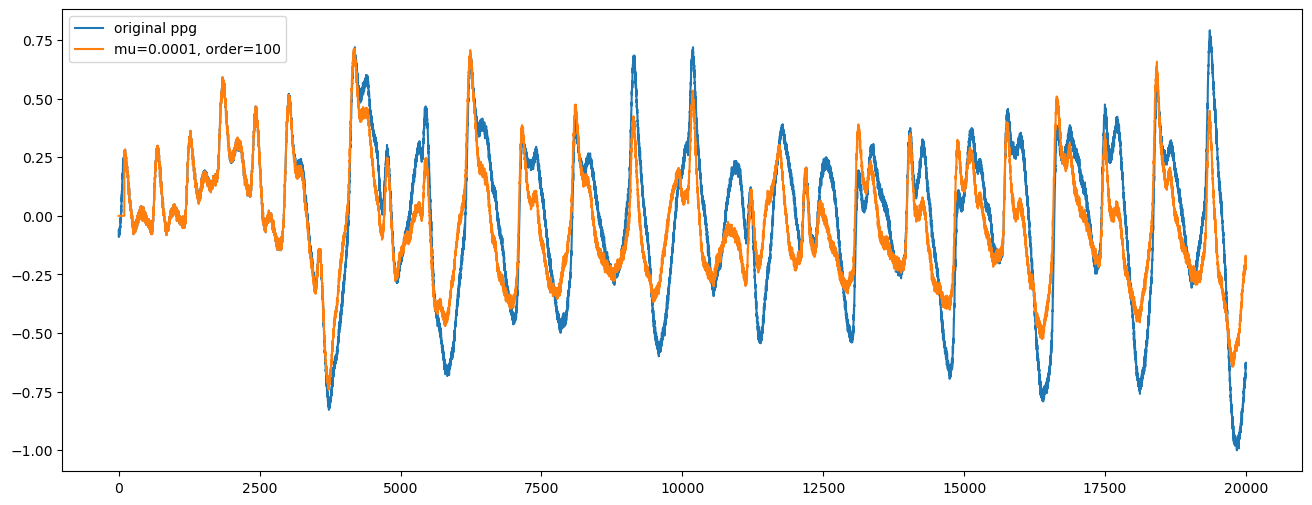

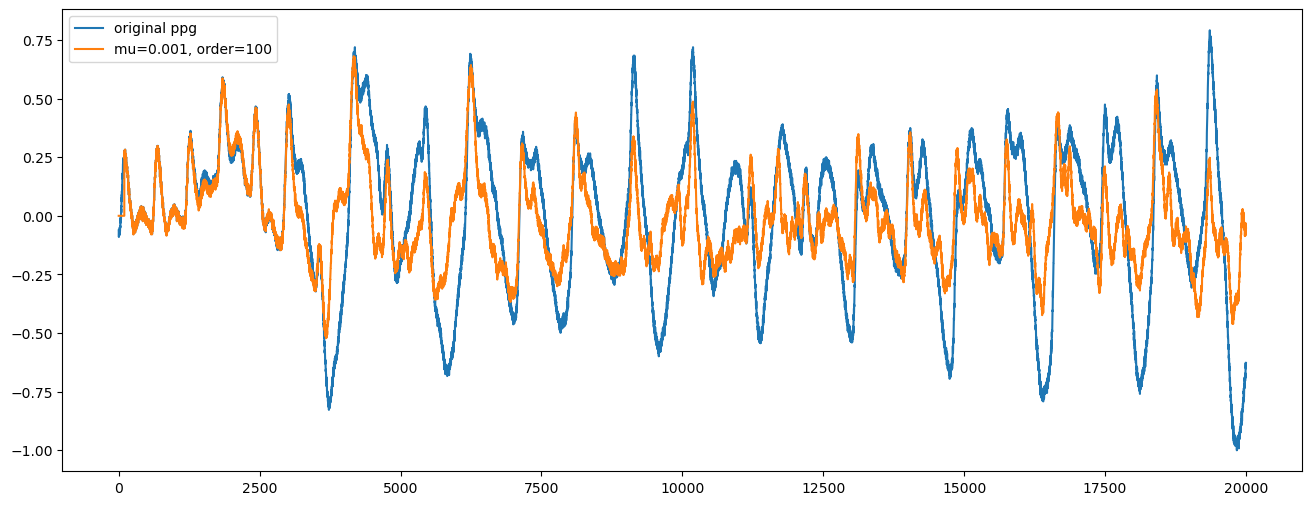

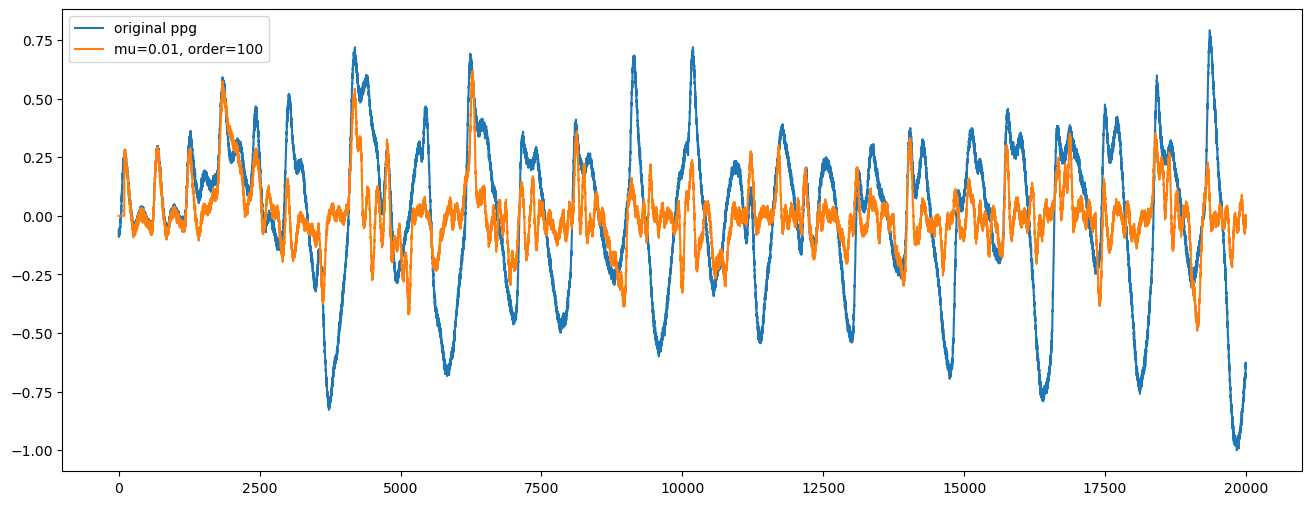

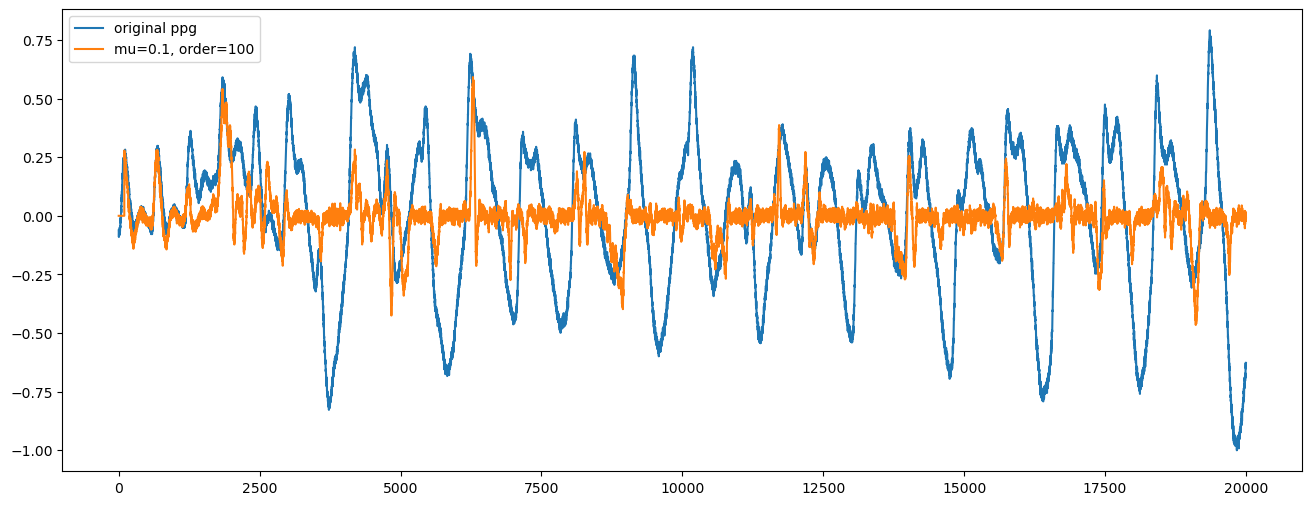

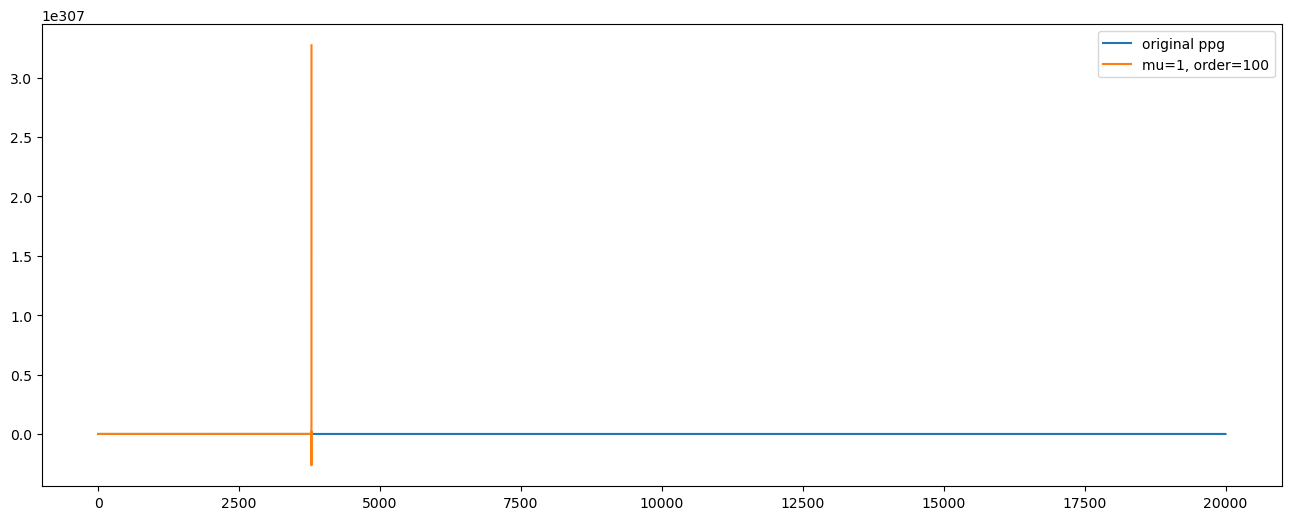

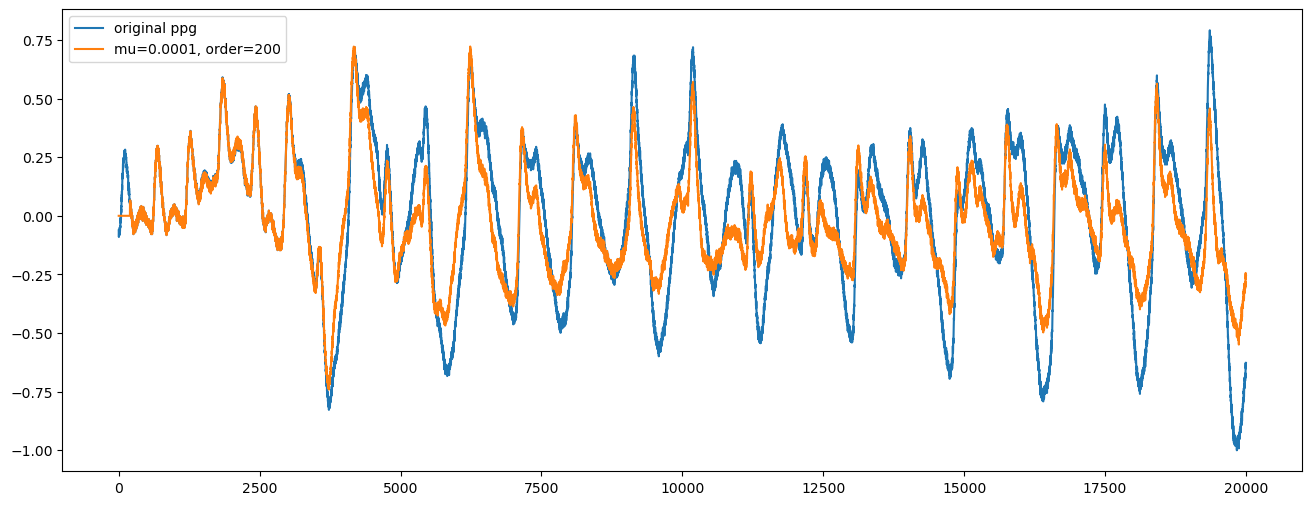

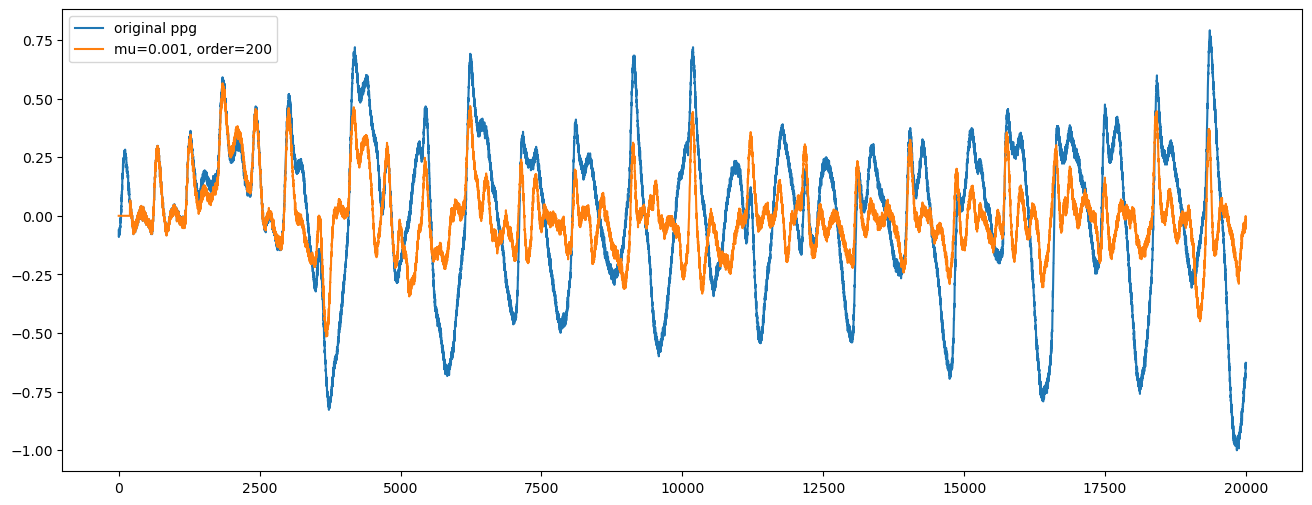

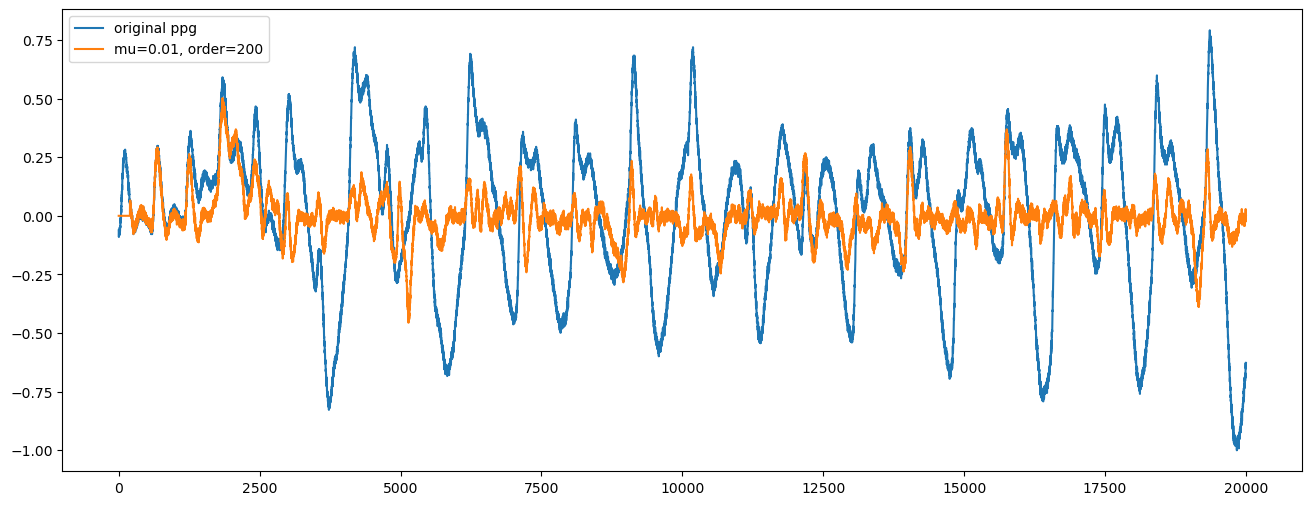

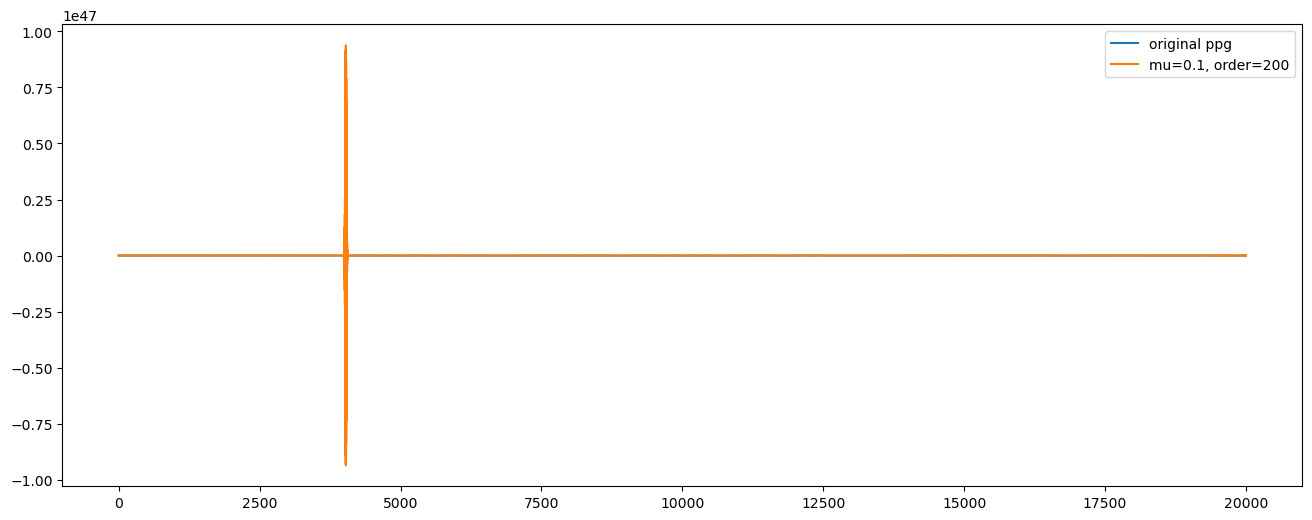

OverflowError: cannot convert float infinity to integer

<Figure size 1600x600 with 1 Axes>

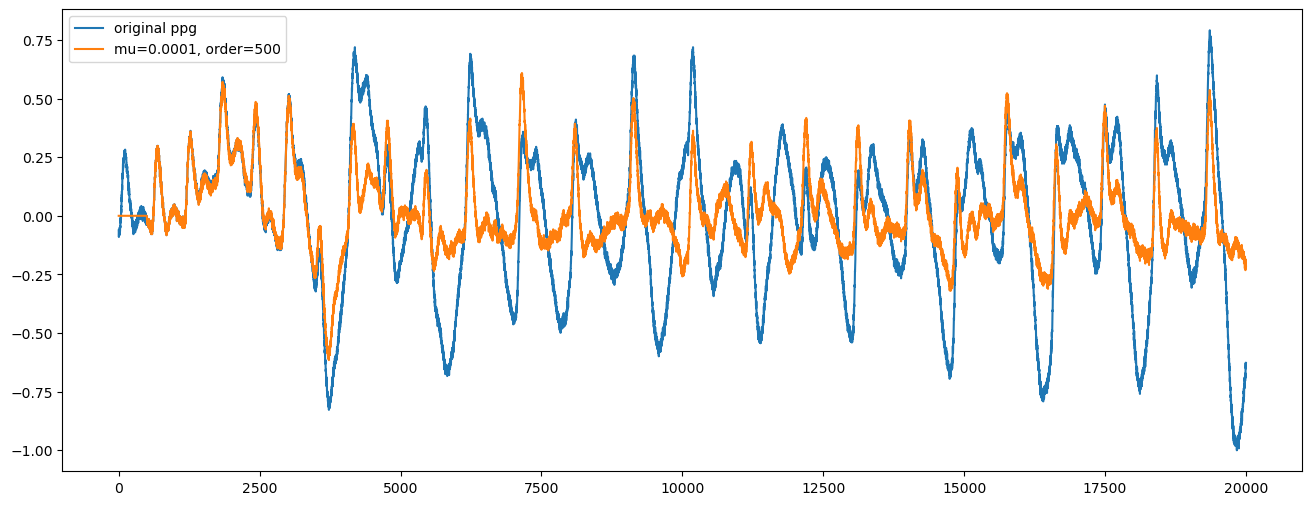

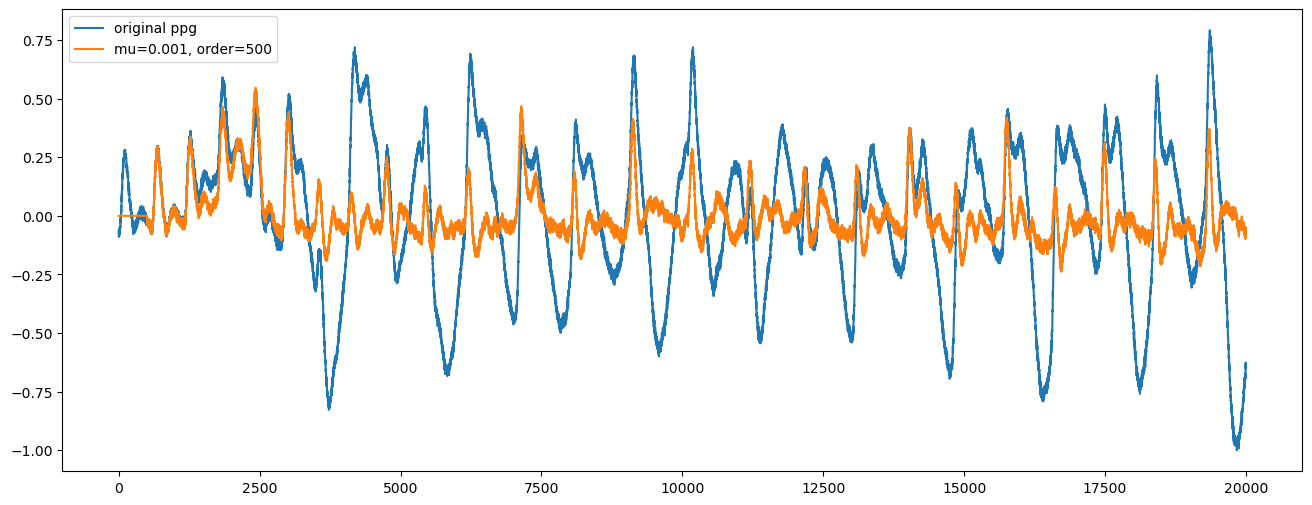

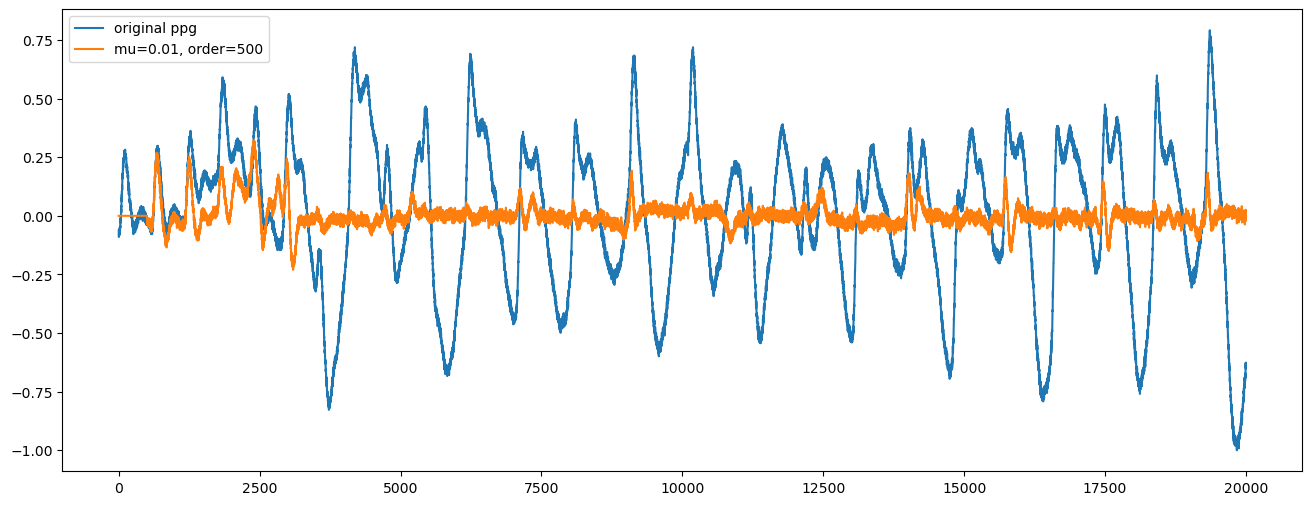

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1600x600 with 1 Axes>

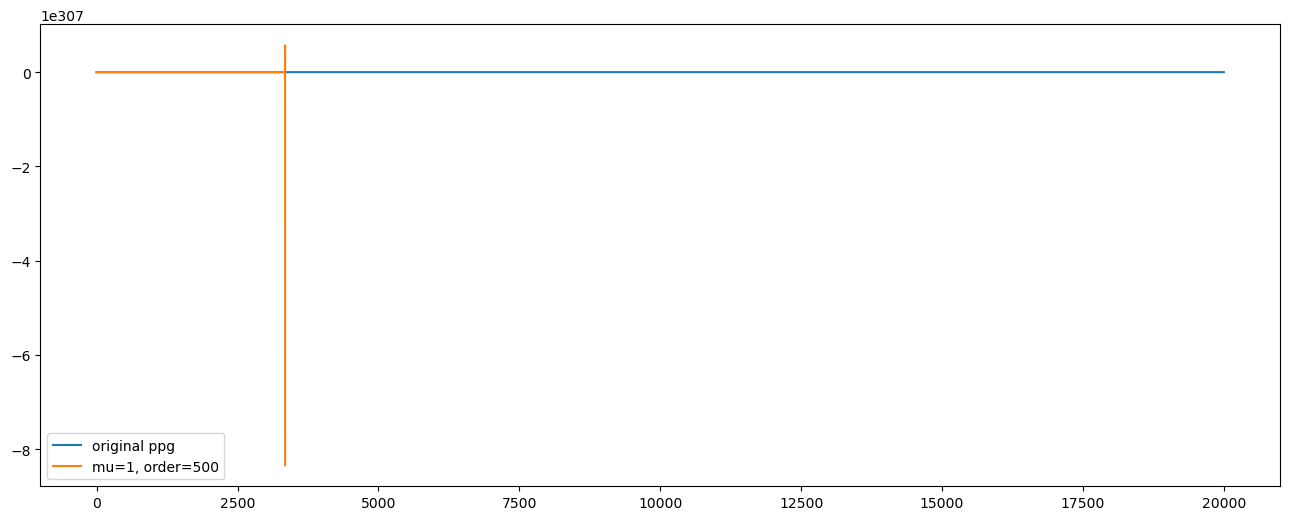

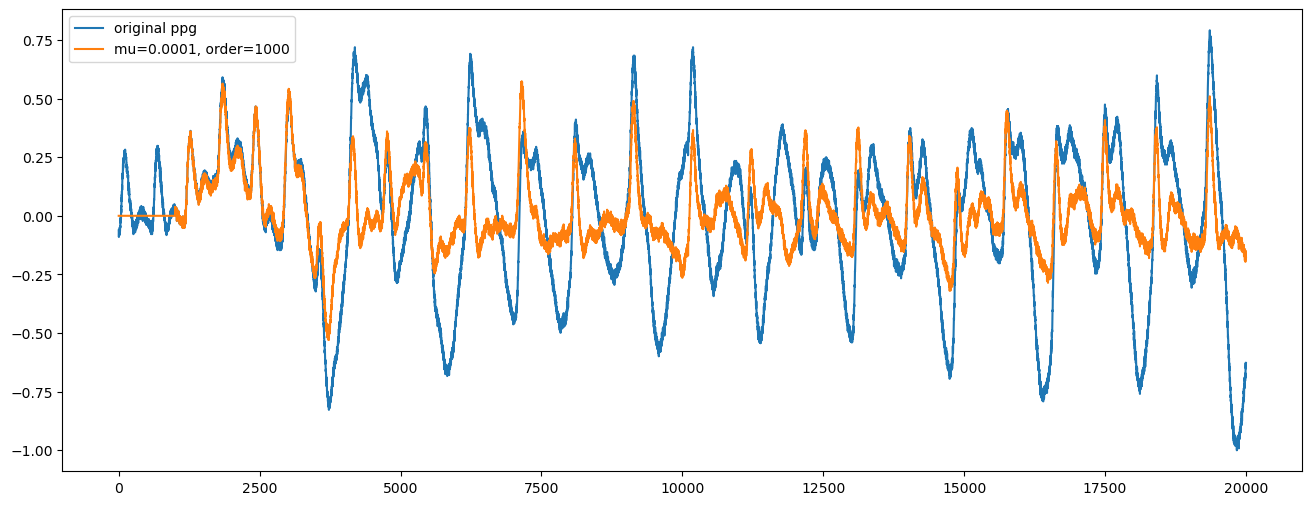

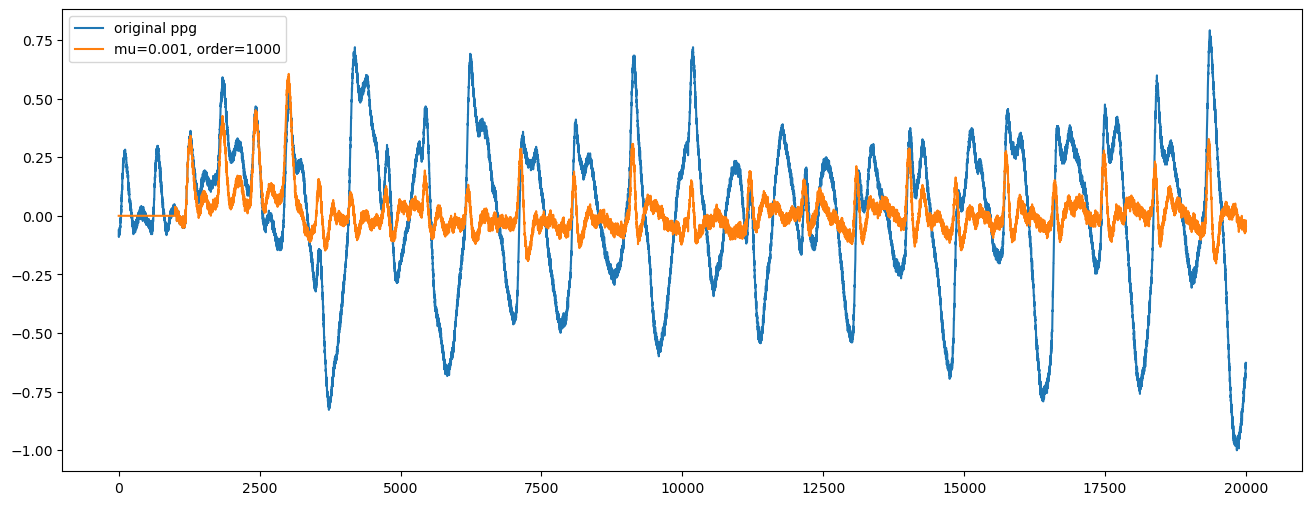

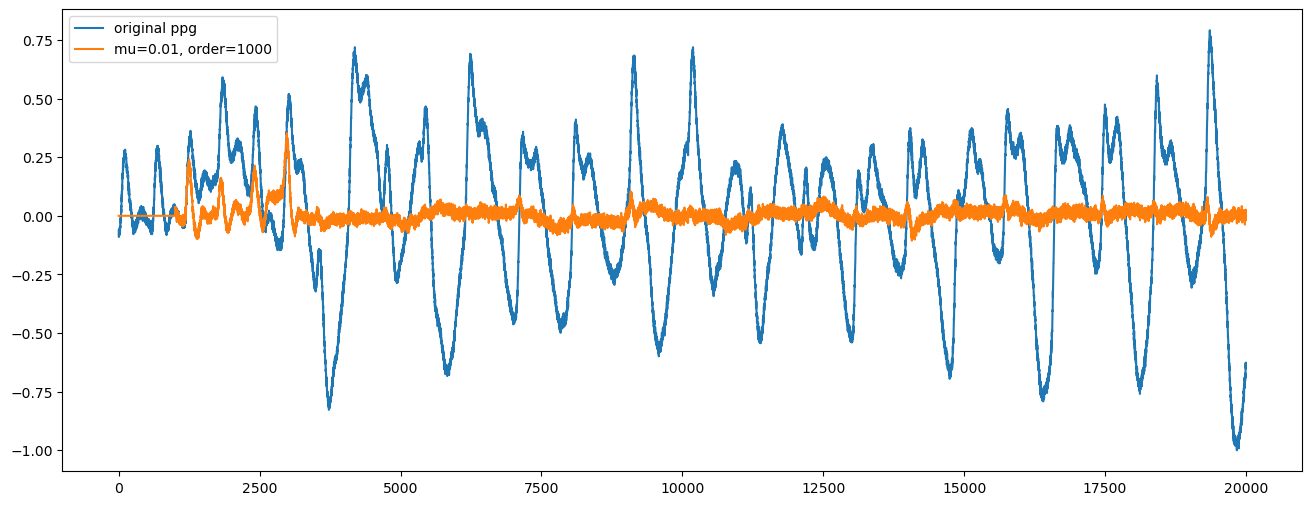

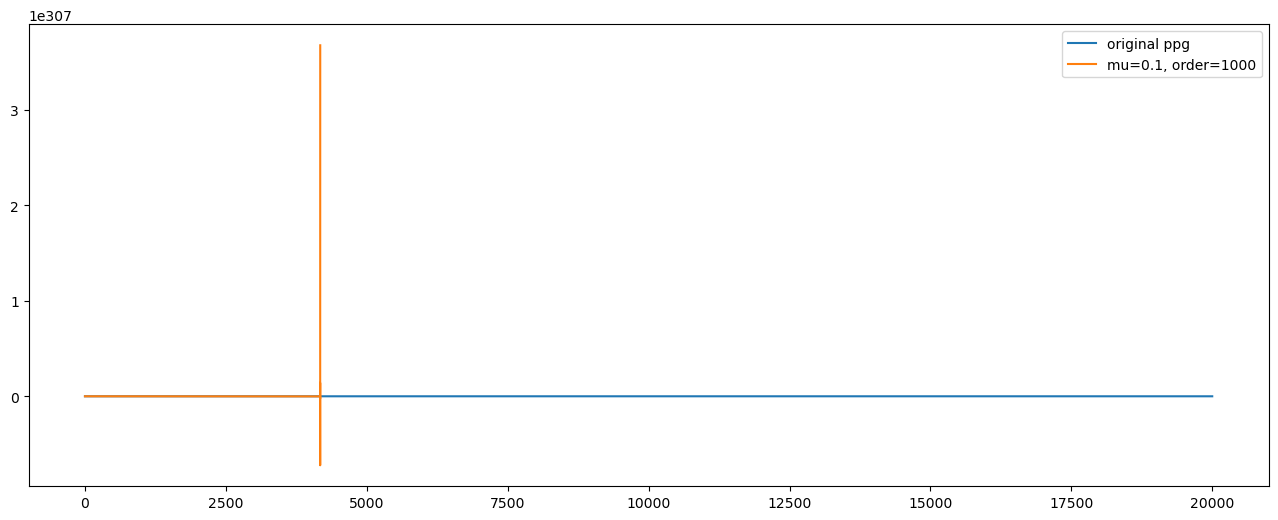

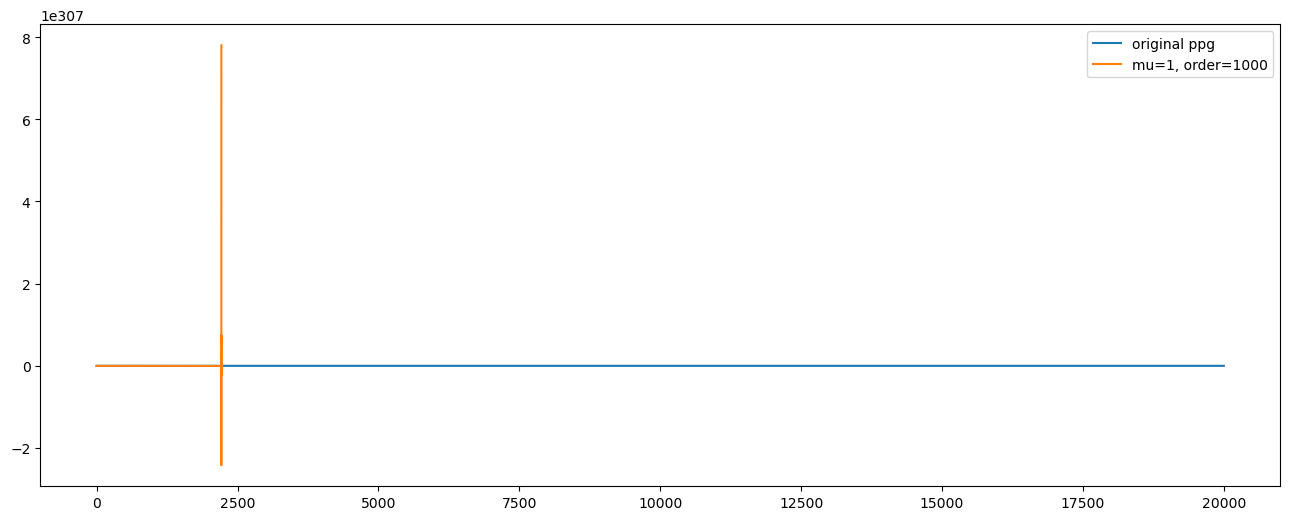

In [62]:
mse_min = float("inf")
selected_order = None
selected_step_size = None
for filtering_order in (1, 5, 10, 25, 50, 100, 200, 500, 1000):
    for step_size in (0.0001, 0.001, 0.01, 0.1, 1):
        y, e, w = lms_filter(ppg, acc, mu = step_size, order=filtering_order)
        plt.figure(figsize=(16, 6))
        plt.plot(ppg, label="original ppg")
        plt.plot(e, label=f"mu={step_size}, order={filtering_order}")
        plt.legend()
        plt.show()

In [55]:
selected_step_size

0.0001